In [1]:
import numpy as np
import matplotlib 
import matplotlib as mpl

import lightkurve 
from lightkurve import KeplerLightCurve, KeplerTargetPixelFile
from k2sc.standalone import k2sc_lc

%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


Populating the interactive namespace from numpy and matplotlib


In [16]:
lightkurve.__version__

'1.0b13'

## Here we debut a lightkurve-based wrapper for k2sc so you can more easily do k2sc operations interactively.

In [2]:
tpf = KeplerTargetPixelFile.from_archive(212300977) # WASP-55

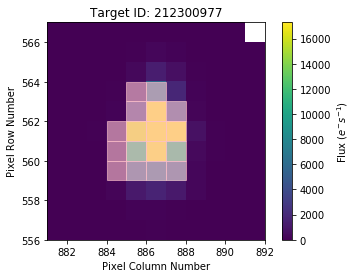

In [3]:
tpf.plot(frame=1,aperture_mask=tpf.pipeline_mask)

In [19]:
lc = tpf.to_lightcurve()
lc.primary_header = tpf.hdu[0].header
lc.data_header = tpf.hdu[1].header
lc.pos_corr1 = tpf.hdu[1].data['POS_CORR1'][tpf.quality_mask]
lc.pos_corr2 = tpf.hdu[1].data['POS_CORR2'][tpf.quality_mask]

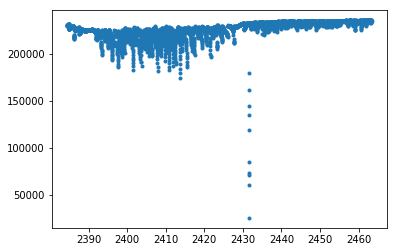

In [5]:
plt.plot(lc.time, lc.flux,'.')


In [9]:
lc.to_fits('test.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1138c6590>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x106b131d0>]

In [10]:
import fitsio

In [11]:
f = fitsio.FITS('test.fits')

In [14]:
hdr = fitsio.read_header('test.fits')

In [15]:
hdr


SIMPLE  =                    T / conforms to FITS standards
BITPIX  =                    8 / array data type
NAXIS   =                    0 / number of array dimensions
EXTEND  =                    T / file contains extensions
NEXTEND =                    2 / number of standard extensions
EXTNAME = 'PRIMARY '           / name of extension
EXTVER  =                    1 / extension version number (not format version)
ORIGIN  = 'Unofficial data product' / institution responsible for file
DATE    = '2018-08-23'         / file creation date.
CREATOR = 'lightkurve'         / pipeline job and program used t
TELESCOP= 'KEPLER  '           / telescope
INSTRUME= 'Kepler Photometer'  / detector type
OBJECT  = '212300977'          / string version of target id
KEPLERID=            212300977 / unique Kepler target identifier
CHANNEL =                   36 / CCD channel
RADESYS = 'ICRS    '           / reference frame of celestial coordinates
RA_OBJ  =            203.75811 / [deg] right ascension


### Let's now try K2SC

In [21]:
# now the magic happens
lc.__class__ = k2sc_lc

In [22]:
lc.k2sc()

Using default splits [2344] for campaign 5
Starting initial outlier detection
  Flagged 147 ( 0.0%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =   18.94 (fap 3.4161e-303 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE
('  DE iteration %3i -ln(L) %4.1f', 0, -4425.828285093708)
('  DE iteration %3i -ln(L) %4.1f', 1, -4425.828285093708)
('  DE iteration %3i -ln(L) %4.1f', 2, -4425.828285093708)
('  DE iteration %3i -ln(L) %4.1f', 3, -4440.557180362137)
('  DE iteration %3i -ln(L) %4.1f', 4, -4440.557180362137)
('  DE iteration %3i -ln(L) %4.1f', 5, -4440.557180362137)
('  DE iteration %3i -ln(L) %4.1f', 6, -4440.557180362137)
('  DE iteration %3i -ln(L) %4.1f', 7, -4443.7621256508055)
('  DE iteration %3i -ln(L) %4.1f', 8, -4443.7621256508055)
('  DE iteration %3i -ln(L) %4.1f', 9, -4445.160390554532)
('  DE iteration %3i -ln(L) %4.1f', 10, -4445.160390554532)
('  DE iteration %3i -ln(L)

Text(0.5,1.01,'WASP-55')

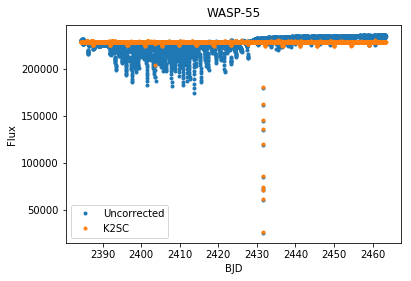

In [23]:
plt.plot(lc.time,lc.flux,'.',label="Uncorrected")
plt.plot(lc.time,lc.corr_flux-lc.tr_time + np.nanmedian(lc.tr_time),'.',label="K2SC")
plt.legend()
plt.xlabel('BJD')
plt.ylabel('Flux')
plt.title('WASP-55',y=1.01)

(215000, 235000)

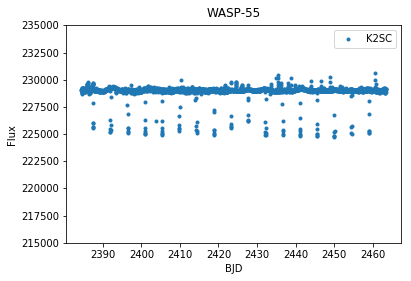

In [24]:
plt.plot(lc.time,lc.corr_flux-lc.tr_time + np.nanmedian(lc.tr_time),'.',label="K2SC")
plt.legend()
plt.xlabel('BJD')
plt.ylabel('Flux')
plt.title('WASP-55',y=1.01)
plt.ylim(215000,235000)

### Now we save this

In [60]:
extras = {'CORR_FLUX':lc.corr_flux,
          'TR_TIME':lc.tr_time,
          'TR_POSITION':lc.tr_position}
lc.to_fits(extra_data=extras,path='test.fits',overwrite=True)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x107009290>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11372c490>]

In [61]:
f = fitsio.FITS('test.fits')
f[1]


  file: test.fits
  extension: 1
  type: BINARY_TBL
  extname: LIGHTCURVE
  rows: 3561
  column info:
    TIME                f8  
    FLUX                f4  
    FLUX_ERR            f4  
    CADENCENO           i4  

In [62]:
hdr = fitsio.read_header('test.fits')

IOError: extension not found: 2 (case insensitive)